In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.03.30']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
765,Afghanistan,22.03.30,177716
1542,Africa,22.03.30,11556141
2307,Albania,22.03.30,273608
3072,Algeria,22.03.30,265662
3831,Andorra,22.03.30,40024
...,...,...,...
170023,Wallis and Futuna,22.03.30,454
170822,World,22.03.30,486865809
171542,Yemen,22.03.30,11805
172285,Zambia,22.03.30,316550


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
765,Afghanistan,22.03.30,177716
2307,Albania,22.03.30,273608
3072,Algeria,22.03.30,265662
3831,Andorra,22.03.30,40024
4572,Angola,22.03.30,99138
...,...,...,...
169495,Vietnam,22.03.30,9472254
170023,Wallis and Futuna,22.03.30,454
171542,Yemen,22.03.30,11805
172285,Zambia,22.03.30,316550


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
164396,United States,22.03.30,80057236
72861,India,22.03.30,43024440
22792,Brazil,22.03.30,29920604
56480,France,22.03.30,25498479
60277,Germany,22.03.30,21142217
163597,United Kingdom,22.03.30,21141374
129734,Russia,22.03.30,17564186
159415,Turkey,22.03.30,14846224
79002,Italy,22.03.30,14567990
146044,South Korea,22.03.30,13095631


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
147558,Spain,22.03.30,11508309
169495,Vietnam,22.03.30,9472254
6873,Argentina,22.03.30,9035127
111304,Netherlands,22.03.30,7927676
75174,Iran,22.03.30,7159733
...,...,...,...
94864,Macao,22.03.30,82
167950,Vatican,22.03.30,29
99898,Marshall Islands,22.03.30,7
131051,Saint Helena,22.03.30,4


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.03.30', df_etc['확진자'].sum()]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [8]:
df_top

,일자,확진자
국가,,
United States,22.03.30,80057236
India,22.03.30,43024440
Brazil,22.03.30,29920604
France,22.03.30,25498479
Germany,22.03.30,21142217
United Kingdom,22.03.30,21141374
Russia,22.03.30,17564186
Turkey,22.03.30,14846224
Italy,22.03.30,14567990


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.03.30,80057236
1,India,22.03.30,43024440
2,Brazil,22.03.30,29920604
3,France,22.03.30,25498479
4,Germany,22.03.30,21142217
5,United Kingdom,22.03.30,21141374
6,Russia,22.03.30,17564186
7,Turkey,22.03.30,14846224
8,Italy,22.03.30,14567990
9,South Korea,22.03.30,13095631


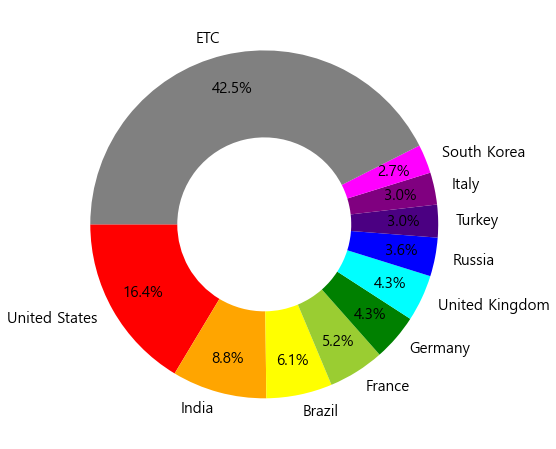

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()